In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [47]:
np.random.seed(12345)

In [3]:
data = pd.read_csv('GOOG2.csv',parse_dates=True)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
1,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
2,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
4,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
602,2022-05-23,2202.080078,2240.110107,2183.084961,2233.330078,2233.330078,1577900
603,2022-05-24,2127.550049,2127.899902,2044.160034,2118.520020,2118.520020,3019300
604,2022-05-25,2102.840088,2130.894043,2084.225098,2116.790039,2116.790039,1895000
605,2022-05-26,2121.010010,2179.104980,2109.760010,2165.919922,2165.919922,1514400
606,2022-05-27,2195.770020,2257.360107,2191.000000,2255.979980,2255.979980,1496200


In [6]:
data.shape

(607, 7)

In [7]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m-%d")

In [9]:
df_close = data[['Date','Adj Close']]

In [10]:
df_close.columns = ['Date','y']

In [11]:
df_close.sort_values(by='Date', inplace=True)

In [12]:
df_close.head(10)

,Date,y
0,2020-01-02,1367.369995
1,2020-01-03,1360.660034
2,2020-01-06,1394.209961
3,2020-01-07,1393.339966
4,2020-01-08,1404.319946
5,2020-01-09,1419.829956
6,2020-01-10,1429.729980
7,2020-01-13,1439.229980
8,2020-01-14,1430.880005
9,2020-01-15,1439.199951


In [13]:
window_size = 45
for i in range(window_size):
  df_close['y'+str(i+1)] = df_close['y'].shift(i+1)

In [14]:
df_close.head()

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
0,2020-01-02,1367.369995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,1360.660034,1367.369995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-06,1394.209961,1360.660034,1367.369995,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-07,1393.339966,1394.209961,1360.660034,1367.369995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-08,1404.319946,1393.339966,1394.209961,1360.660034,1367.369995,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_close.dropna(axis=0, inplace=True)

In [16]:
df_close.head()

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
45,2020-03-09,1215.560059,1298.410034,1319.040039,1386.520020,1341.390015,1389.109985,1339.329956,1318.089966,1393.180054,...,1439.199951,1430.880005,1439.229980,1429.729980,1419.829956,1404.319946,1393.339966,1394.209961,1360.660034,1367.369995
46,2020-03-10,1280.390015,1215.560059,1298.410034,1319.040039,1386.520020,1341.390015,1389.109985,1339.329956,1318.089966,...,1451.699951,1439.199951,1430.880005,1439.229980,1429.729980,1419.829956,1404.319946,1393.339966,1394.209961,1360.660034
47,2020-03-11,1215.410034,1280.390015,1215.560059,1298.410034,1319.040039,1386.520020,1341.390015,1389.109985,1339.329956,...,1480.390015,1451.699951,1439.199951,1430.880005,1439.229980,1429.729980,1419.829956,1404.319946,1393.339966,1394.209961
48,2020-03-12,1114.910034,1215.410034,1280.390015,1215.560059,1298.410034,1319.040039,1386.520020,1341.390015,1389.109985,...,1484.400024,1480.390015,1451.699951,1439.199951,1430.880005,1439.229980,1429.729980,1419.829956,1404.319946,1393.339966
49,2020-03-13,1219.729980,1114.910034,1215.410034,1280.390015,1215.560059,1298.410034,1319.040039,1386.520020,1341.390015,...,1485.949951,1484.400024,1480.390015,1451.699951,1439.199951,1430.880005,1439.229980,1429.729980,1419.829956,1404.319946


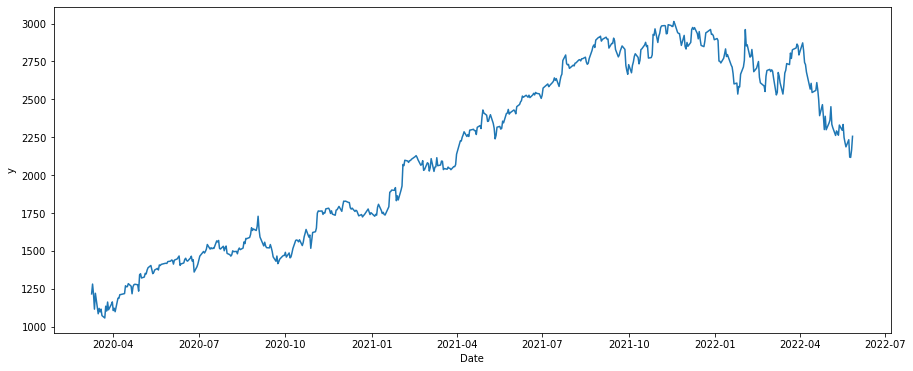

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,6))
sns.lineplot(data=df_close, x='Date',y='y')
plt.show()

In [19]:
df_train = df_close[df_close['Date'] <= pd.to_datetime('2022-05-15')]
df_test = df_close[df_close['Date'] > pd.to_datetime('2022-05-15')]

In [20]:
df_train.tail()

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
592,2022-05-09,2261.679932,2313.199951,2334.929932,2451.500000,2362.590088,2343.139893,2299.330078,2388.229980,2300.409912,...,2692.010010,2673.810059,2593.209961,2534.820068,2609.510010,2653.639893,2677.320068,2545.570068,2529.290039,2642.439941
593,2022-05-10,2291.689941,2261.679932,2313.199951,2334.929932,2451.500000,2362.590088,2343.139893,2299.330078,2388.229980,...,2736.030029,2692.010010,2673.810059,2593.209961,2534.820068,2609.510010,2653.639893,2677.320068,2545.570068,2529.290039
594,2022-05-11,2279.219971,2291.689941,2261.679932,2313.199951,2334.929932,2451.500000,2362.590088,2343.139893,2299.330078,...,2729.570068,2736.030029,2692.010010,2673.810059,2593.209961,2534.820068,2609.510010,2653.639893,2677.320068,2545.570068
595,2022-05-12,2263.219971,2279.219971,2291.689941,2261.679932,2313.199951,2334.929932,2451.500000,2362.590088,2343.139893,...,2805.550049,2729.570068,2736.030029,2692.010010,2673.810059,2593.209961,2534.820068,2609.510010,2653.639893,2677.320068
596,2022-05-13,2330.310059,2263.219971,2279.219971,2291.689941,2261.679932,2313.199951,2334.929932,2451.500000,2362.590088,...,2770.070068,2805.550049,2729.570068,2736.030029,2692.010010,2673.810059,2593.209961,2534.820068,2609.510010,2653.639893


In [21]:
df_test.head(10)

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
597,2022-05-16,2295.850098,2330.310059,2263.219971,2279.219971,2291.689941,2261.679932,2313.199951,2334.929932,2451.500000,...,2826.239990,2770.070068,2805.550049,2729.570068,2736.030029,2692.010010,2673.810059,2593.209961,2534.820068,2609.510010
598,2022-05-17,2334.030029,2295.850098,2330.310059,2263.219971,2279.219971,2291.689941,2261.679932,2313.199951,2334.929932,...,2830.429932,2826.239990,2770.070068,2805.550049,2729.570068,2736.030029,2692.010010,2673.810059,2593.209961,2534.820068
599,2022-05-18,2248.020020,2334.030029,2295.850098,2330.310059,2263.219971,2279.219971,2291.689941,2261.679932,2313.199951,...,2839.000000,2830.429932,2826.239990,2770.070068,2805.550049,2729.570068,2736.030029,2692.010010,2673.810059,2593.209961
600,2022-05-19,2214.909912,2248.020020,2334.030029,2295.850098,2330.310059,2263.219971,2279.219971,2291.689941,2261.679932,...,2865.000000,2839.000000,2830.429932,2826.239990,2770.070068,2805.550049,2729.570068,2736.030029,2692.010010,2673.810059
601,2022-05-20,2186.260010,2214.909912,2248.020020,2334.030029,2295.850098,2330.310059,2263.219971,2279.219971,2291.689941,...,2852.889893,2865.000000,2839.000000,2830.429932,2826.239990,2770.070068,2805.550049,2729.570068,2736.030029,2692.010010
602,2022-05-23,2233.330078,2186.260010,2214.909912,2248.020020,2334.030029,2295.850098,2330.310059,2263.219971,2279.219971,...,2792.989990,2852.889893,2865.000000,2839.000000,2830.429932,2826.239990,2770.070068,2805.550049,2729.570068,2736.030029
603,2022-05-24,2118.520020,2233.330078,2186.260010,2214.909912,2248.020020,2334.030029,2295.850098,2330.310059,2263.219971,...,2814.000000,2792.989990,2852.889893,2865.000000,2839.000000,2830.429932,2826.239990,2770.070068,2805.550049,2729.570068
604,2022-05-25,2116.790039,2118.520020,2233.330078,2186.260010,2214.909912,2248.020020,2334.030029,2295.850098,2330.310059,...,2872.850098,2814.000000,2792.989990,2852.889893,2865.000000,2839.000000,2830.429932,2826.239990,2770.070068,2805.550049
605,2022-05-26,2165.919922,2116.790039,2118.520020,2233.330078,2186.260010,2214.909912,2248.020020,2334.030029,2295.850098,...,2821.260010,2872.850098,2814.000000,2792.989990,2852.889893,2865.000000,2839.000000,2830.429932,2826.239990,2770.070068
606,2022-05-27,2255.979980,2165.919922,2116.790039,2118.520020,2233.330078,2186.260010,2214.909912,2248.020020,2334.030029,...,2743.520020,2821.260010,2872.850098,2814.000000,2792.989990,2852.889893,2865.000000,2839.000000,2830.429932,2826.239990


In [22]:
df_test.shape

(10, 47)

In [23]:
X_train = df_train.drop(['Date','y'],axis=1)
y_train = df_train['y']

X_test = df_test.drop(['Date','y'],axis=1)
y_test = df_test['y']

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [26]:
X_train.shape

(552, 45)

In [27]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [29]:
print(X_train.shape)
print(X_test.shape)

(552, 45, 1)
(10, 45, 1)


In [31]:
model = Sequential()

In [32]:
model.add(LSTM(128, 
               activation='relu', 
               return_sequences=True, 
               input_shape=(None,1)))

In [33]:
model.add(LSTM(64, activation = 'relu'))

In [34]:
model.add(Dense(units = 1, activation = 'linear'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 128)         66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam', 
              loss='huber' , 
              metrics = 'mape')

In [ ]:
# Mape = Avg(Abs(Actual - Predicted)/Actual)
# 1 - MAPE = Accuracy

In [38]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
18/18 [==============================] - 4s 97ms/step - loss: 2131.3057 - mape: 98.8302
Epoch 2/100
18/18 [==============================] - 2s 97ms/step - loss: 2028.6912 - mape: 94.0760
Epoch 3/100
18/18 [==============================] - 2s 98ms/step - loss: 2144.3794 - mape: 99.8495
Epoch 4/100
18/18 [==============================] - 2s 96ms/step - loss: 2143.4365 - mape: 99.8160
Epoch 5/100
18/18 [==============================] - 2s 98ms/step - loss: 3354.1514 - mape: 141.6122
Epoch 6/100
18/18 [==============================] - 2s 95ms/step - loss: 2146.2390 - mape: 99.9051
Epoch 7/100
18/18 [==============================] - 2s 97ms/step - loss: 2146.6692 - mape: 99.9255
Epoch 8/100
18/18 [==============================] - 2s 96ms/step - loss: 2146.6860 - mape: 99.9263
Epoch 9/100
18/18 [==============================] - 2s 97ms/step - loss: 2146.6677 - mape: 99.9254
Epoch 10/100
18/18 [==============================] - 2s 100ms/step - loss: 2146.6382 - mape: 99.92

In [39]:
pred = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_percentage_error

In [42]:
np.round(100 - mean_absolute_percentage_error(y_true = y_test, y_pred = pred)*100,2)

97.11

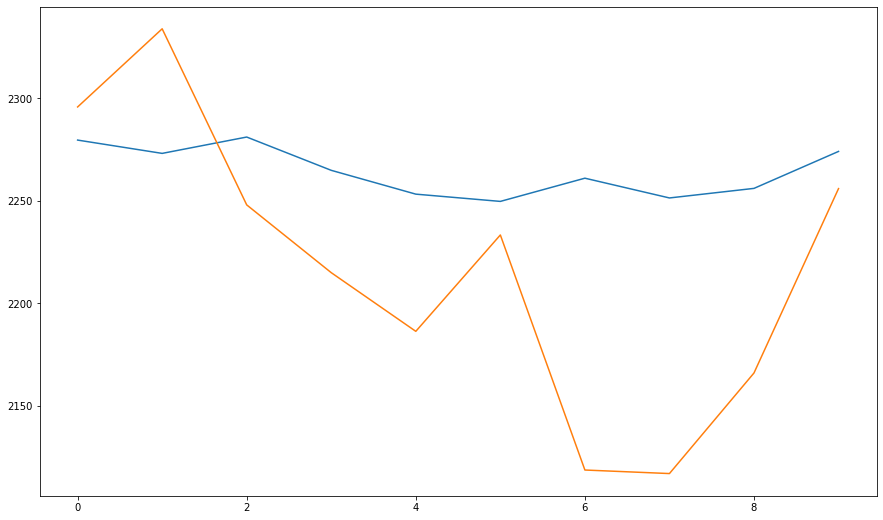

In [44]:
plt.figure(figsize = (15,9))
plt.plot(pred)
plt.plot(y_test.values)
plt.show()

In [45]:
pred

array([[2279.6746],
       [2273.1755],
       [2281.1611],
       [2264.897 ],
       [2253.2693],
       [2249.724 ],
       [2261.0608],
       [2251.4097],
       [2256.0823],
       [2274.1362]], dtype=float32)

In [46]:
y_test

597    2295.850098
598    2334.030029
599    2248.020020
600    2214.909912
601    2186.260010
602    2233.330078
603    2118.520020
604    2116.790039
605    2165.919922
606    2255.979980
Name: y, dtype: float64